In [1]:
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.layers import Normalization
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Flatten
from keras import layers
pd.set_option('display.max_rows', 50)
from tensorflow.keras import optimizers
import random


2021-08-31 23:11:09.814321: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-31 23:11:09.814424: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [97]:
df_merged = pd.read_csv("data_final_20210826_v3.csv")

In [98]:
df_merged = df_merged.iloc[406:]

In [99]:
df_merged

,tweet_date,party,poll,reply_count,retweet_count,like_count,avg_len_of_tweet,avg_followers_count,avg_following_count,avg_user_tweet_count,avg_ff_ratio,share_of_tweets,share_unique_users,weighted_sentiment,share_of_positive_tweets,share_of_negative_tweets
406,2021-07-23,AFD,11.0,5414.0,7430.0,50589.0,183.483988,9897.783065,844.707798,30258.523792,11.717405,0.241723,0.599421,-0.822698,0.028768,0.587842
407,2021-07-23,CDU,28.0,5430.0,8987.0,53965.0,191.227455,5095.104329,921.350581,26716.583105,5.530039,0.207085,0.673073,-0.466696,0.035058,0.480465
408,2021-07-23,FDP,12.0,2551.0,1854.0,15224.0,171.541570,4400.461124,791.273287,26521.715935,5.561241,0.113623,0.675905,-0.385271,0.061971,0.476905
409,2021-07-23,GRUENE,19.0,6288.0,7621.0,60041.0,182.306444,3682.779195,773.788140,24578.680470,4.759415,0.264028,0.619016,-0.267626,0.060460,0.439125
410,2021-07-23,LINKE,7.0,401.0,268.0,1625.0,181.312292,1976.892027,746.588040,36722.935216,2.647902,0.026328,0.616279,-0.050804,0.061462,0.373754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,2021-08-26,FDP,12.0,3976.0,3199.0,29066.0,155.032074,3785.480448,749.313049,17960.210457,5.051935,0.110768,0.716828,-0.577197,0.056459,0.527460
647,2021-08-26,GRUENE,18.0,7423.0,9063.0,63348.0,178.698807,4663.179284,690.310107,20607.243817,6.755195,0.193819,0.638167,-0.149995,0.062775,0.406026
648,2021-08-26,LINKE,7.0,887.0,713.0,5282.0,190.801338,963.538462,684.646823,20400.862207,1.407351,0.036379,0.590635,-0.134164,0.060201,0.400669
649,2021-08-26,OTHER,6.0,1550.0,2166.0,11618.0,175.401146,1340.969436,638.417861,14171.402579,2.100457,0.050955,0.579752,-0.129097,0.087393,0.409742


In [77]:
selected_columns = ['tweet_date', 'party', 'poll', 'retweet_count',
       'like_count', 'avg_user_tweet_count', 'avg_ff_ratio',
       'share_of_tweets', 'share_unique_users', 'weighted_sentiment',
       'share_of_positive_tweets', 'share_of_negative_tweets']

In [5]:
df_merged = df_merged[selected_columns]

In [6]:
df_merged = df_merged.replace(np.nan, 0)

In [7]:
df_merged.isna().sum() / len(df_merged)

tweet_date                  0.0
party                       0.0
poll                        0.0
retweet_count               0.0
like_count                  0.0
avg_user_tweet_count        0.0
avg_ff_ratio                0.0
share_of_tweets             0.0
share_unique_users          0.0
weighted_sentiment          0.0
share_of_positive_tweets    0.0
share_of_negative_tweets    0.0
dtype: float64

In [8]:
df_merged = df_merged.replace(np.nan, 0)

In [9]:
num_features = [ "retweet_count", "like_count", "avg_user_tweet_count","avg_ff_ratio"]
remaing_columns = ["share_of_tweets","share_unique_users","weighted_sentiment","share_of_positive_tweets","share_of_negative_tweets"]

/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/lucab/.pyenv/versions/3.8.6/envs/project_delphi/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments witho

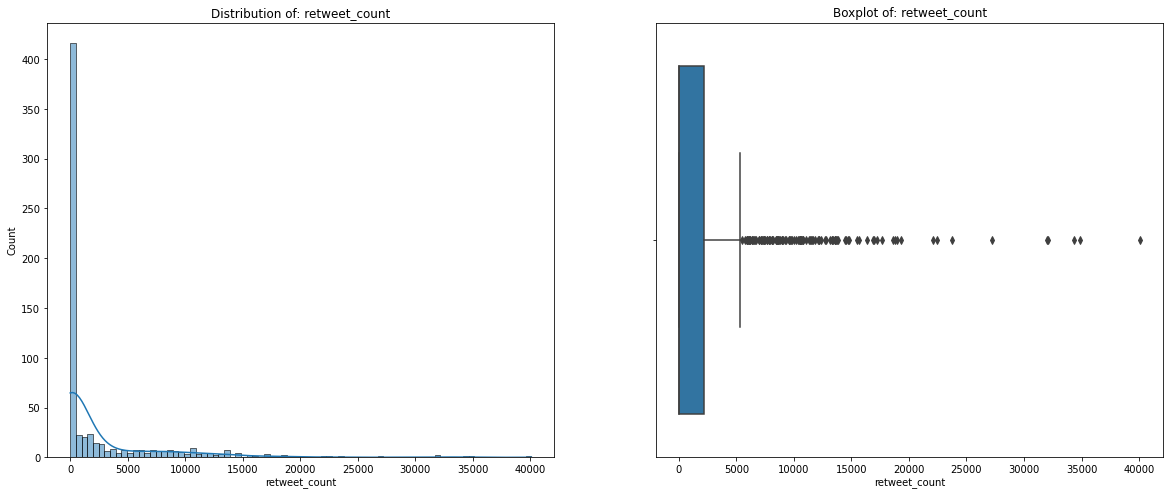

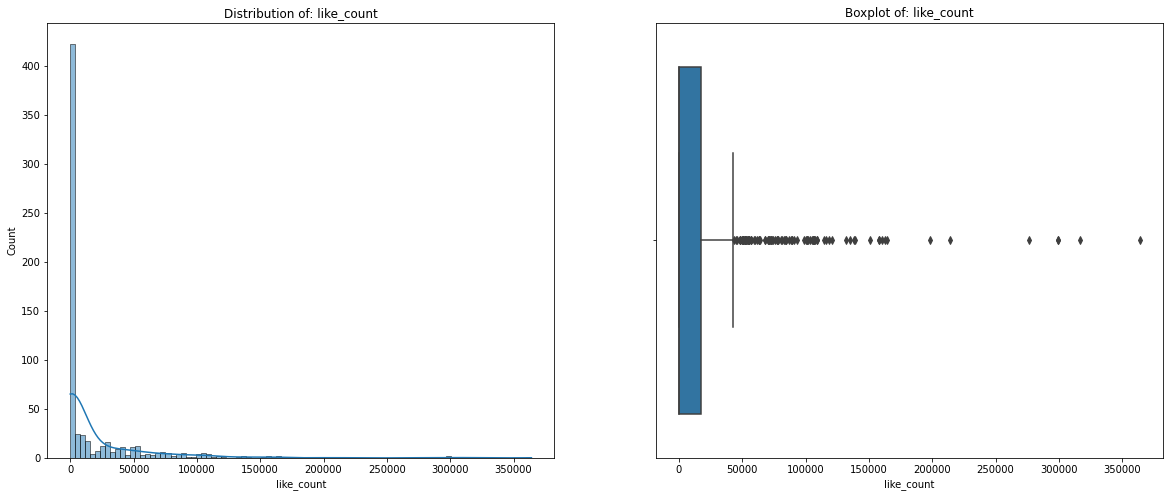

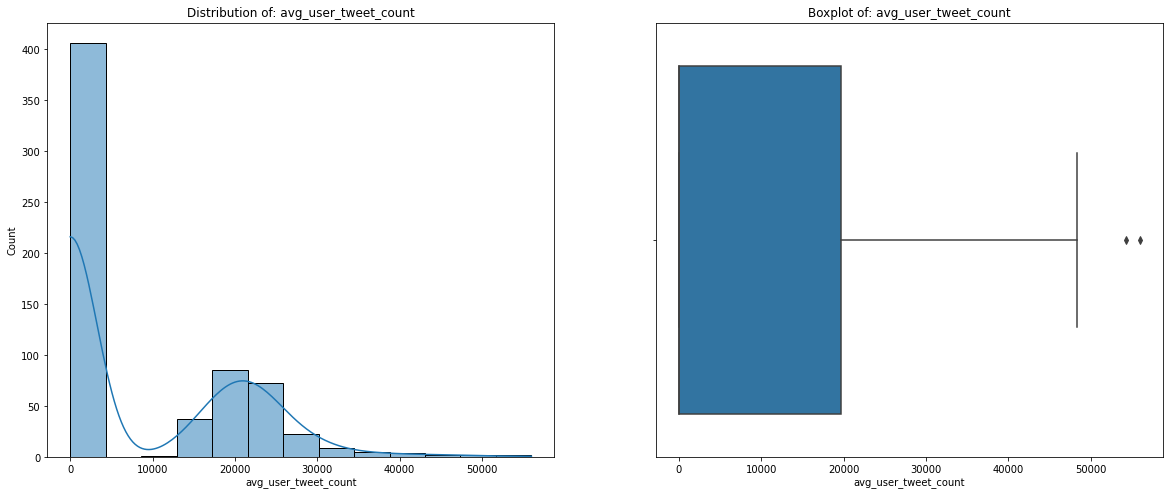

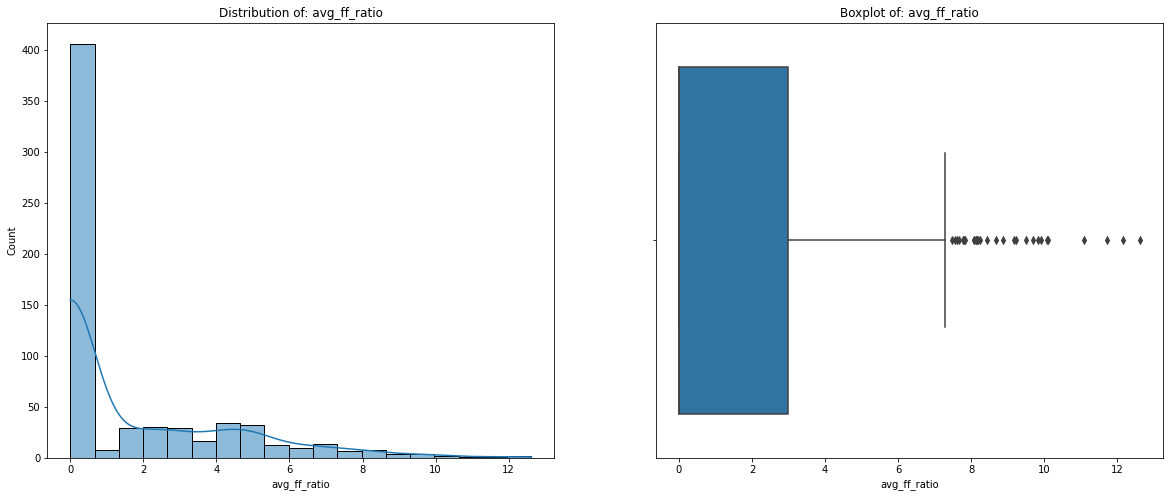

In [10]:
for _ in num_features:
    fig, ax =plt.subplots(1,2,figsize=(20,8))
    ax[0].set_title(f"Distribution of: {_}")
    sns.histplot(data = df_merged[_], kde = True, ax = ax[0])
    ax[1].set_title(f"Boxplot of: {_}")
    sns.boxplot(df_merged[_], ax=ax[1])
    fig.show()

In [11]:
df_merged["tweet_date"] = pd.to_datetime(df_merged["tweet_date"])

In [12]:
df_merged = df_merged.groupby([pd.Grouper(key='tweet_date',freq='D'), "party"]).agg({
#     "reply_count": "sum", 
    "retweet_count": "sum",
    "like_count": "sum",
#     "avg_len_of_tweet": "mean" ,
#     "avg_followers_count": "mean" ,
#     "avg_following_count": "mean" ,
    "avg_user_tweet_count" :"mean",
    "avg_ff_ratio" :"mean",
    "share_of_tweets" :"mean",
    "share_unique_users": "mean",
    "weighted_sentiment" : "mean",
    "share_of_positive_tweets": "mean",
    "share_of_negative_tweets" : "mean",
    "poll": "mean"}) 

In [13]:
df_real_true = df_merged.iloc[-7:]

In [14]:
df_merged = df_merged.iloc[:-7]

In [15]:
df_merged_final_test = df_merged.iloc[-14:]

In [16]:
df_merged_final = df_merged.iloc[:-21]

In [17]:
# def splitting_data(df):
    
#     split_percentage = 0.80
#     split_index = round(split_percentage * len(df)) 
    
#     for num in range(split_index, split_index + 7):
#         if df_merged[num:(num + 1)].index[0][1] == "AFD":
#             split_index = num
#         else:
#             pass
#     df_train = df[:split_index]
#     df_test = df[split_index:]
    
#     return df_train, df_test

In [18]:
# df_train, df_test = splitting_data(df_merged)

In [19]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

mm_scaler.fit(df_merged_final[num_features])

numerical_train_scaled = mm_scaler.transform(df_merged_final[num_features])
numerical_test_scaled = mm_scaler.transform(df_merged_final_test[num_features])

In [20]:
df_merged_poll = df_merged_final["poll"] / 100
df_merged_poll_test = df_merged_final_test["poll"] / 100

In [21]:
df_numerical_train_scaled = pd.DataFrame(numerical_train_scaled, columns = num_features, index = df_merged_final.index)

In [22]:
df_merged_scaled = pd.concat([df_numerical_train_scaled,df_merged_final[remaing_columns], pd.DataFrame(df_merged_poll, columns = ["poll"], index = df_merged_final.index)] , axis = 1)

In [23]:
df_merged_final.tail(50)

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-08-15 SPD            8215.0     57201.0          24573.901537   
2021-08-16 AFD           11554.0     70553.0          15433.539301   
           CDU           40099.0    364122.0          21032.508512   
           FDP            3446.0     35336.0          19508.699352   
           GRUENE         8973.0     59564.0          22500.671992   
           LINKE          1341.0      8231.0          22237.583211   
           OTHER          1667.0      9270.0          23911.147945   
           SPD            6047.0     39854.0          24013.366207   
2021-08-17 AFD           10589.0     55109.0          16461.607335   
           CDU           11017.0    106867.0          20690.520840   
           FDP            1145.0     11973.0          18486.449905   
           GRUENE         5783.0     51682.0          21680.166639   
           LINKE          2082.0      9337.0          22845.778961   
           OTHER          1487.0      6368.0          18461.485751   
           SPD            7417.0     42385.0          23787.899956   
2021-08-18 AFD            8495.0     42125.0          16513.092762   
           CDU           18629.0    157770.0          20956.249173   
           FDP            1894.0     19607.0          19321.698621   
           GRUENE         6482.0     47894.0          21250.521789   
           LINKE           780.0      5754.0          34761.479592   
           OTHER          1721.0      7177.0          21629.070442   
           SPD           12208.0     89058.0          22415.754757   
2021-08-19 AFD           22420.0    150545.0          18357.740443   
           CDU           13706.0    114198.0          23241.594635   
           FDP            1298.0     17023.0          18036.088285   
           GRUENE        10028.0     80389.0          19069.423512   
           LINKE          1277.0      7572.0          39381.365951   
           OTHER          1844.0      9123.0          19001.951713   
           SPD            7336.0     67993.0          22211.833674   
2021-08-20 AFD           14416.0     84530.0          19276.103621   
           CDU           18779.0    157624.0          25524.652557   
           FDP            3013.0     50788.0          17576.081876   
           GRUENE        10663.0     77386.0          20154.122642   
           LINKE           913.0      4496.0          28985.925121   
           OTHER          1778.0     10005.0          14308.620886   
           SPD            7633.0     72957.0          25768.230960   
2021-08-21 AFD            8062.0     43694.0          18614.152969   
           CDU           34871.0    299311.0          21555.514918   
           FDP            1504.0     20974.0          18608.164776   
           GRUENE         6359.0     45000.0          19712.231850   
           LINKE           586.0      3526.0          30382.684148   
           OTHER          1694.0     10416.0          15921.818467   
           SPD            7151.0     51925.0          24988.088988   
2021-08-22 AFD           10751.0     52790.0          18015.823812   
           CDU           32083.0    276465.0          22622.168589   
           FDP            2394.0     26284.0          19050.287573   
           GRUENE        15612.0    134664.0          21511.120516   
           LINKE           723.0      4170.0          28596.294664   
           OTHER          1568.0      8618.0          16347.991399   
           SPD            8402.0     70828.0          23533.012017   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-08-15 SPD         8.866368         0.158373            0.628226   
2021-08-16 AFD         4.086176         0.111865            0.602284   
           CDU         4.402057         0.460216            0.537008   
           FDP    

In [24]:
df_test_scaled = pd.concat([pd.DataFrame(numerical_test_scaled, columns = num_features, index = df_merged_final_test.index),df_merged_final_test[remaing_columns], pd.DataFrame(df_merged_poll_test, columns = ["poll"], index = df_merged_final_test.index)] , axis = 1)

In [25]:
df_test_scaled

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-08-24 AFD          0.253772    0.157164              0.306606   
           CDU          0.337290    0.324529              0.403102   
           FDP          0.050525    0.059505              0.392171   
           GRUENE       0.386593    0.447718              0.329249   
           LINKE        0.020549    0.023616              0.522067   
           OTHER        0.064540    0.038405              0.343767   
           SPD          0.232001    0.201432              0.440016   
2021-08-25 AFD          0.317589    0.243265              0.304755   
           CDU          0.361480    0.380087              0.375650   
           FDP          0.062570    0.074060              0.293208   
           GRUENE       0.334896    0.290710              0.353204   
           LINKE        0.041747    0.039992              0.530633   
           OTHER        0.053368    0.038825              0.250487   
           SPD          0.421681    0.293179              0.444314   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-08-24 AFD         0.214866         0.119979            0.582482   
           CDU         0.430143         0.223637            0.643972   
           FDP         0.405920         0.076187            0.729321   
           GRUENE      0.422012         0.355201            0.565707   
           LINKE       0.687210         0.032075            0.636471   
           OTHER       0.503892         0.034716            0.602717   
           SPD         0.485217         0.158205            0.670364   
2021-08-25 AFD         0.222877         0.142871            0.610545   
           CDU         0.402177         0.259018            0.608679   
           FDP         0.394246         0.093089            0.715478   
           GRUENE      0.312600         0.236578            0.584365   
           LINKE       0.346934         0.046913            0.550127   
           OTHER       0.253724         0.046295            0.560913   
           SPD         0.576656         0.175236            0.662231   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-08-24 AFD              -0.719665                  0.050480   
           CDU              -0.301281                  0.041593   
           FDP              -0.453854                  0.058692   
           GRUENE           -0.302278                  0.077180   
           LINKE            -0.163161                  0.062941   
           OTHER            -0.111000                  0.080978   
           SPD              -0.431172                  0.057126   
2021-08-25 AFD              -0.837779                  0.048682   
           CDU              -0.452031                  0.044395   
           FDP              -0.515992                  0.055877   
           GRUENE           -0.190728                  0.061242   
           LINKE            -0.059278                  0.050127   
           OTHER            -0.058430                  0.083082   
           SPD              -0.401099                  0.050722   

                   share_of_negative_tweets   poll  
tweet_date party                                    
2021-08-24 AFD                     0.570844  0.100  
           CDU                     0.441660  0.220  
           FDP                     0.497524  0.120  
           GRUENE                  0.454903  0.180  
           LINKE                   0.404706  0.060  
           OTHER                   0.406522  0.090  
           SPD                     0.482767  0.230  
2021-08-25 AFD                     0.600921  0.120  
           CDU                     0.484189  0.225  
           FDP                     0.513595  0.125  
           GRUENE                  0

In [26]:
def subsequence(df, length, start = 0):
    last_possible_start = (len(df)) - length 
    X = df[start:start + length]
    y = df["poll"][(start + length ) : (start + length + 7)]
    
    return X, y

In [27]:
def multiple_subsequences(df, length):
    
    list_of_X = []
    list_of_y = []
    
    number_of_subsequences = round(len(df) / length)
    start = 0
    for num in range(number_of_subsequences):
        temporary_X, temporary_y = subsequence(df, length, start)
        list_of_X.append(temporary_X)
        list_of_y.append(temporary_y)
        start = start + 7
    
    return list_of_X, list_of_y

    
    
    

In [28]:
X_train , y_train = multiple_subsequences(pd.DataFrame(df_merged_scaled), 14 )


In [29]:
len(X_train)

44

In [30]:
model = Sequential()
# model.add(layers.Masking(mask_value=-9999, input_shape=X_train[0].shape))
model.add(layers.GRU(units=128, activation='tanh', return_sequences=True))
model.add(layers.GRU(units=64, activation='tanh', return_sequences=False))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(7, activation='linear'))


2021-08-31 23:11:17.849324: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-31 23:11:17.849404: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-31 23:11:17.849446: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LAPTOP-69AIGBNI): /proc/driver/nvidia/version does not exist
2021-08-31 23:11:17.849729: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
%%time

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(X_train, y_train ,
          epochs=50, 
          batch_size=1, 
          verbose=1, 
          validation_split=0.2,
          shuffle = False
     )



ValueError: Data cardinality is ambiguous:
  x sizes: 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11
  y sizes: 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7
Make sure all arrays contain the same number of samples.

In [32]:
df_merged_final_day = np.array(df_test_scaled.iloc[-28:])
df_merged_final_day = np.expand_dims(df_merged_final_day, axis = 0)

In [33]:
df_merged_final_test = np.expand_dims(df_merged_final_test, axis = 0)

In [34]:
df_test_scaled

retweet_count  like_count  avg_user_tweet_count  \
tweet_date party                                                     
2021-08-24 AFD          0.253772    0.157164              0.306606   
           CDU          0.337290    0.324529              0.403102   
           FDP          0.050525    0.059505              0.392171   
           GRUENE       0.386593    0.447718              0.329249   
           LINKE        0.020549    0.023616              0.522067   
           OTHER        0.064540    0.038405              0.343767   
           SPD          0.232001    0.201432              0.440016   
2021-08-25 AFD          0.317589    0.243265              0.304755   
           CDU          0.361480    0.380087              0.375650   
           FDP          0.062570    0.074060              0.293208   
           GRUENE       0.334896    0.290710              0.353204   
           LINKE        0.041747    0.039992              0.530633   
           OTHER        0.053368    0.038825              0.250487   
           SPD          0.421681    0.293179              0.444314   

                   avg_ff_ratio  share_of_tweets  share_unique_users  \
tweet_date party                                                       
2021-08-24 AFD         0.214866         0.119979            0.582482   
           CDU         0.430143         0.223637            0.643972   
           FDP         0.405920         0.076187            0.729321   
           GRUENE      0.422012         0.355201            0.565707   
           LINKE       0.687210         0.032075            0.636471   
           OTHER       0.503892         0.034716            0.602717   
           SPD         0.485217         0.158205            0.670364   
2021-08-25 AFD         0.222877         0.142871            0.610545   
           CDU         0.402177         0.259018            0.608679   
           FDP         0.394246         0.093089            0.715478   
           GRUENE      0.312600         0.236578            0.584365   
           LINKE       0.346934         0.046913            0.550127   
           OTHER       0.253724         0.046295            0.560913   
           SPD         0.576656         0.175236            0.662231   

                   weighted_sentiment  share_of_positive_tweets  \
tweet_date party                                                  
2021-08-24 AFD              -0.719665                  0.050480   
           CDU              -0.301281                  0.041593   
           FDP              -0.453854                  0.058692   
           GRUENE           -0.302278                  0.077180   
           LINKE            -0.163161                  0.062941   
           OTHER            -0.111000                  0.080978   
           SPD              -0.431172                  0.057126   
2021-08-25 AFD              -0.837779                  0.048682   
           CDU              -0.452031                  0.044395   
           FDP              -0.515992                  0.055877   
           GRUENE           -0.190728                  0.061242   
           LINKE            -0.059278                  0.050127   
           OTHER            -0.058430                  0.083082   
           SPD              -0.401099                  0.050722   

                   share_of_negative_tweets   poll  
tweet_date party                                    
2021-08-24 AFD                     0.570844  0.100  
           CDU                     0.441660  0.220  
           FDP                     0.497524  0.120  
           GRUENE                  0.454903  0.180  
           LINKE                   0.404706  0.060  
           OTHER                   0.406522  0.090  
           SPD                     0.482767  0.230  
2021-08-25 AFD                     0.600921  0.120  
           CDU                     0.484189  0.225  
           FDP                     0.513595  0.125  
           GRUENE                  0

In [35]:
df_prediction = pd.DataFrame(model.predict(df_merged_final_test)).rename( \
                        columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'}).round(3)
df_prediction.index = ["pred"]

df_prediction

2021-08-31 23:11:18.444467: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
pred,0.766,-0.348,0.45,0.21,0.24,0.625,-0.097


In [36]:
np.sum(df_prediction, axis = 1)

pred    1.846
dtype: float32

In [37]:
df_prediction_2 = pd.DataFrame((df_prediction.iloc[0]) / np.sum(df_prediction.iloc[0])).T
df_prediction_2

,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
pred,0.414951,-0.188516,0.24377,0.113759,0.130011,0.33857,-0.052546


In [38]:
np.sum(df_prediction_2, axis = 1)

pred    1.0
dtype: float32

In [39]:
# df_true = pd.DataFrame(y_test[-1].reshape(1,-1)).rename( \
#                         columns = {0:'AFD',1:'CDU',2:'FDP',3: 'GRUENE',4: 'LINKE', 5:'OTHER', 6: 'SPD'})

# df_true.index = ["true"]

# df_true

In [40]:
df_true = pd.DataFrame(df_real_true["poll"].unstack()) / 100

In [41]:
pd.concat([df_true, df_prediction_2]).round(2)

,AFD,CDU,FDP,GRUENE,LINKE,OTHER,SPD
2021-08-26 00:00:00,0.11,0.23,0.12,0.18,0.07,0.06,0.23
pred,0.41,-0.19,0.24,0.11,0.13,0.34,-0.05


In [42]:
def plot_loss_mae(history):

# --- LOSS

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model MAE')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()
    
# --- MAE

    plt.plot(history.history['mae'])
    plt.plot(history.history['val_mae'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    plt.show()

In [43]:
plot_loss_mae(history)

NameError: name 'history' is not defined

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot( data = df_merged["poll"].unstack())


In [ ]:
df_train.reset_index()["party"]

In [ ]:
df_train

In [101]:
df_plotting_spd = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "SPD"].drop(columns = "party")
df_plotting_cdu = df_train_scaled.reset_index().loc[df_train_scaled.reset_index()["party"] == "CDU"].drop(columns = "party")

NameError: name 'df_train_scaled' is not defined

In [102]:
df_plotting_spd

NameError: name 'df_plotting_spd' is not defined

In [100]:
new_df = df_plotting_spd.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)

NameError: name 'df_plotting_spd' is not defined

In [ ]:
new_df = df_plotting_cdu.melt(id_vars='tweet_date', 
                 value_name='val', 
                 var_name='type')

sns.lineplot(x='tweet_date', y='val', hue='type', data=new_df)